In [131]:
import pandas
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [142]:
data = pandas.read_excel("all_1nm_data.xls", header=0, skiprows=3)
#data

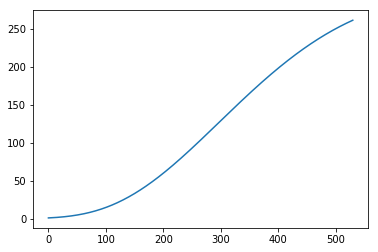

In [144]:
lights = data[data.columns[1:3]]
light = numpy.array(lights[lights.columns[0]])
nan_locs = numpy.isnan(light)
light[nan_locs] = 0
plt.plot(light)
plt.show()

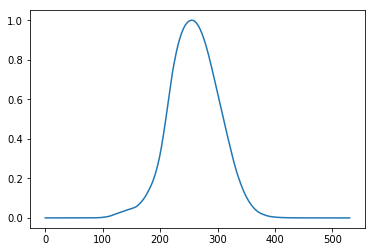

In [145]:
mats = data[data.columns[3:5]]
mat = numpy.array(mats[mats.columns[0]])
nan_locs = numpy.isnan(mat)
mat[nan_locs] = 0
plt.plot(mat)
plt.show()

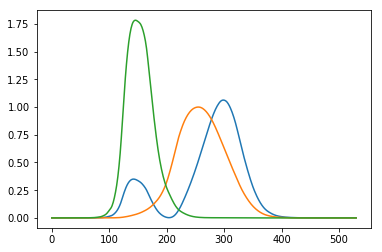

In [152]:
refs = [data[data.columns[5:8]],data[data.columns[8:12]]]
ref = refs[0]
ref = [numpy.array(ref[ref.columns[0]]),numpy.array(ref[ref.columns[1]]),numpy.array(ref[ref.columns[2]])]
for r in ref:
    nan_locs = numpy.isnan(r)
    r[nan_locs] = 0
plt.plot(ref[0])
plt.plot(ref[1])
plt.plot(ref[2])
plt.show()

In [153]:
refl = mat*light
refl

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

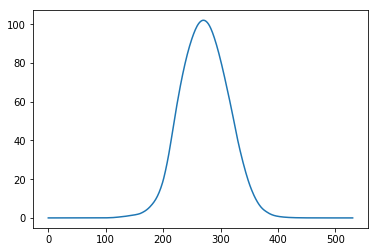

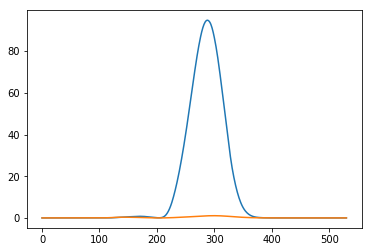

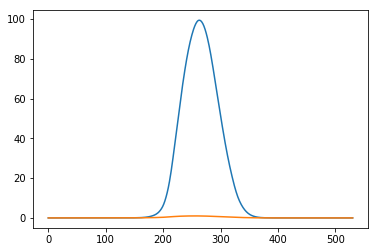

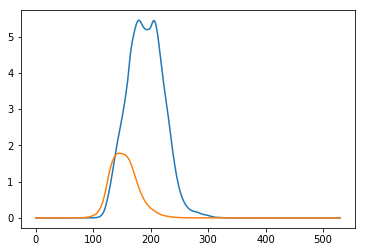

[6526.804878122407, 7697.353994543337, 462.595188826312]

In [159]:
def CIEXYZ(showgrafs=False): #spectator,light,mat
    #for i in data[data.columns[0]]:
    px = refl*ref[0]
    
    py = refl*ref[1]

    pz = refl*ref[2]

    if showgrafs:
        plt.plot(refl)
        plt.show()
        
        plt.plot(px)
        plt.plot(ref[0])
        plt.show()
        
        plt.plot(py)
        plt.plot(ref[1])
        plt.show()
        
        plt.plot(pz)
        plt.plot(ref[2])
        plt.show()
        
    p = [numpy.sum(px),numpy.sum(py),numpy.sum(pz)]
    return p
CIEXYZ(True)

In [169]:
def CIExyY(showgrafs=False): #spectator,light,mat
    px = refl*ref[0]
    py = refl*ref[1]
    pz = refl*ref[2]
    tot = px+py+pz
    k = 1./(light*ref[1])     
    x = px/tot
    y = py/tot
    Y = 1
    p = [x,y,Y]
    return p
CIExyY()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


[array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,     

In [166]:
def cube(x):
    if 0<=x: return x**(1./3.)
    return -(-x)**(1./3.)

def f(v):
    eps = 0.008856
    if v > eps:
        return cube(v)
    return (k*V+16)/116 

def CIELab():
    xyz = CIEXYZ()
    Refxyz = [1,1,1]
    _xyz = [xyz[0]/Refxyz[0],xyz[1]/Refxyz[1],xyz[2]/Refxyz[2]]
    fxyz = [f(_xyz[0]),f(_xyz[1]),f(_xyz[2])]
    L = 116*fxyz[1]-16
    a = 500*(fxyz[0]-fxyz[1])
    b = 200*(fxyz[1]-fxyz[2])
    p = [L,a,b]
    return p
CIELab()

[2274.367341938474, -528.1858653613654, 2402.1227344197277]

In [170]:
RGBref = [0.2126,0.7152,0.0722]


In [ ]:
def sRGB():
    xyz = CIEXYZ()
    tot = xyz[0]+ xyz[1]+ xyz[2]
    _xyz = [xyz[0]/tot,xyz[1]/tot,xyz[2]/tot]
    M = [[],[],[]]
    return p

In [ ]:

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*numpy.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    pp = CIEXYZ()
    ax.scatter(pp[0], pp[1], pp[2], c=c, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')